<a href="https://colab.research.google.com/github/Eddudos/boston-housing-regression/blob/main/boston_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Values in Suburbs of Boston
The medv variable is the target variable.

In [6]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import load_boston
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [8]:
boston = load_boston()
print(boston.DESCR)  # Data Set Characteristics

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


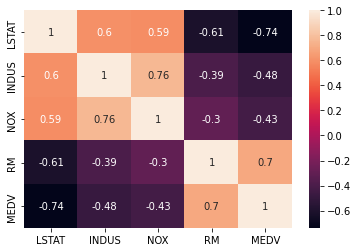

In [9]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

heatmap = sns.heatmap(boston_df[cols].corr(),
                 cbar=True,
                 annot=True)

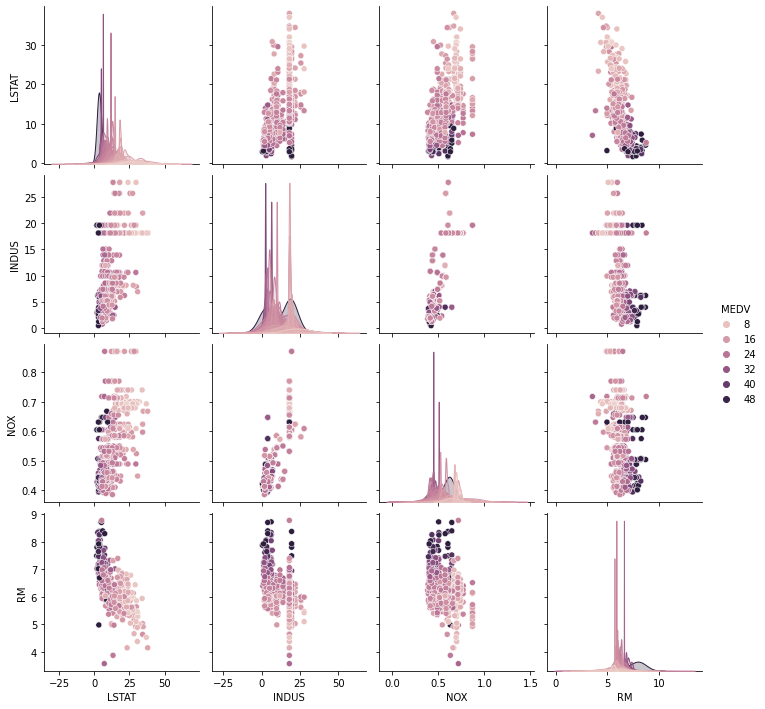

In [10]:
sns.pairplot(boston_df[cols], hue = 'MEDV')
plt.show()

In [11]:
X = boston_df[['LSTAT']].values
y = boston_df['MEDV'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=2021)

In [13]:
slr = LinearRegression()
slr.fit(X_train, Y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

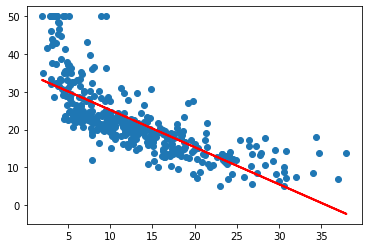

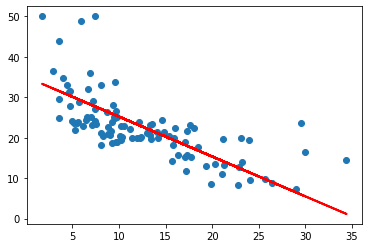

In [15]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_train_pred, color='red', linewidth=2);
plt.show()
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, color='red', linewidth=2);

In [16]:
# MAE
mae_train =  metrics.mean_absolute_error(Y_train, y_train_pred)
mae_test =  metrics.mean_absolute_error(Y_test, y_test_pred)

# MSE
mse_train =  metrics.mean_squared_error(Y_train, y_train_pred)
mse_test =  metrics.mean_squared_error(Y_test, y_test_pred)

print(f'MSE train: {round(mse_test, 3)}, test: {round(mse_train, 3)}')
print(f'MAE train: {round(mae_test, 3)}, test: {round(mae_train, 3)}')

MSE train: 34.482, test: 39.567
MAE train: 4.235, test: 4.613
